In [1]:
# %% [markdown]
"""
## 1. Setup: Imports, Fonts, and Plotting Parameters
"""
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Match LaTeX manuscript fonts (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 11

# Inline plots for Jupyter Notebook
%matplotlib inline


ModuleNotFoundError: No module named 'seaborn'

In [36]:
# %% [markdown]
"""
## 2. Load Manually Updated CSV (No Simulations)
"""
# %%
data = pd.read_csv('EtchStability_with_HCl_KOH.csv')

# Confirm quick view
display(data.head())

# Verify your solvents and groups clearly
print("Solvents:", data['Solvent'].unique())
print("Inorganic Groups:", data['Inorganic'].unique())


,Inorganic,Organic,Solvent,Thickness,Normalized Thickness
0,DEZ,CB,Water,-0.95334,0.04666
1,DEZ,THB,Water,-0.93273,0.06727
2,DEZ,MPD,Ethanol,-0.91000,0.09000
3,DEZ,EG,Water,-0.88508,0.11492
4,DEZ,BTY,Water,-0.79954,0.20046


Solvents: ['Water' 'Ethanol' 'Chloroform' 'Acetone' 'Toluene' 'Air' '0.01 M HCl'
 '0.1 M KOH']
Inorganic Groups: ['DEZ' 'TMA']


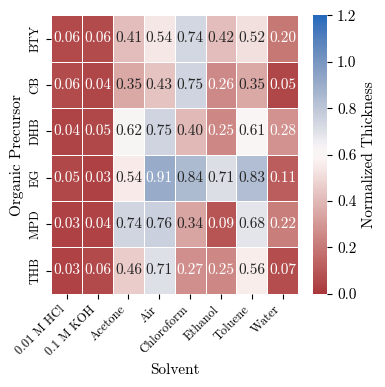

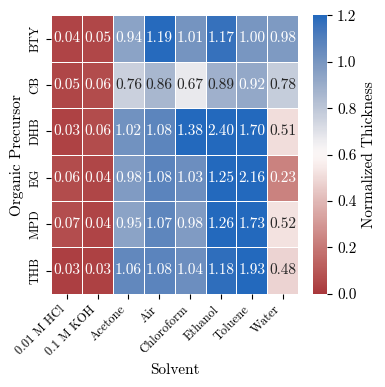

In [37]:
# %% [markdown]
"""
## 3. Individual Heatmaps per Inorganic Group (Fully Annotated)
"""
# %%
cmap_choice = 'vlag_r'
vmin, vmax = 0, 1.2
inorganic_groups = data['Inorganic'].unique()

for inorganic_group in inorganic_groups:
    group_df = data[data['Inorganic'] == inorganic_group]
    pivot_table = group_df.pivot_table(index='Organic', columns='Solvent', values='Normalized Thickness')

    # Check if pivot table is empty
    if pivot_table.empty or pivot_table.shape[0] < 1 or pivot_table.shape[1] < 1:
        print(f"Skipping '{inorganic_group}' - insufficient data.")
        continue

    plt.figure(figsize=(4,4))
    ax = sns.heatmap(
        pivot_table, cmap=cmap_choice, vmin=vmin, vmax=vmax,
        annot=True, fmt='.2f', linewidths=0.5,
        cbar_kws={'label':'Normalized Thickness'}
    )

    ax.set_xlabel('Solvent', fontsize=11)
    ax.set_ylabel('Organic Precursor', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    plt.tight_layout()
    plt.savefig(f'Heatmap_{inorganic_group}.pdf', dpi=600, bbox_inches='tight')
    plt.savefig(f'Heatmap_{inorganic_group}.png', dpi=600, bbox_inches='tight')
    plt.show()


Skipping empty group: Organic
Skipping empty group: Inorganic


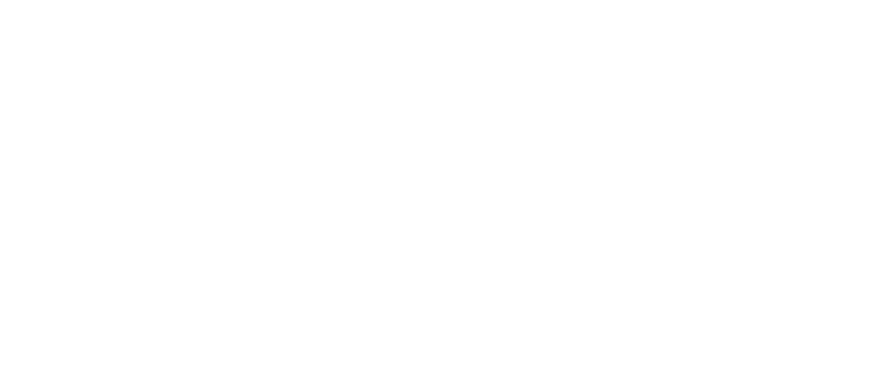

In [33]:
# %% [markdown]
"""
## 4. Combined Side-by-Side Heatmaps (Organic and Inorganic)
"""
# %%
fig, axes = plt.subplots(1, 2, figsize=(9,4), sharey=True)

panel_labels = ['(a)', '(b)']
groups = ['Organic', 'Inorganic']

for idx, (ax, inorganic_group) in enumerate(zip(axes, groups)):
    group_df = data[data['Inorganic'] == inorganic_group]
    pivot_table = group_df.pivot_table(index='Organic', columns='Solvent', values='Normalized Thickness')

    if pivot_table.isnull().all().all():
        print(f"Skipping empty group: {inorganic_group}")
        ax.axis('off')
        continue

    sns.heatmap(
        pivot_table, cmap='vlag_r', vmin=0, vmax=1.2, annot=True, fmt='.2f',
        linewidths=0.5, cbar=(idx==1), square=True,
        cbar_kws={'label':'Normalized Thickness'} if idx==1 else None, ax=ax
    )

    ax.text(0.03, 0.97, panel_labels[idx], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

    ax.set_xlabel('Solvent', fontsize=11)
    if idx == 0:
        ax.set_ylabel('Organic Precursor', fontsize=11)
    else:
        ax.set_ylabel('')

    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
fig.savefig('Combined_Heatmap.pdf', dpi=600, bbox_inches='tight')
fig.savefig('Combined_Heatmap.png', dpi=600, bbox_inches='tight')

plt.show()


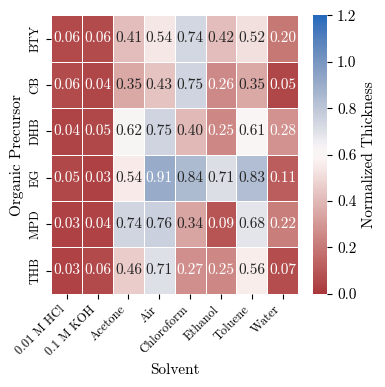

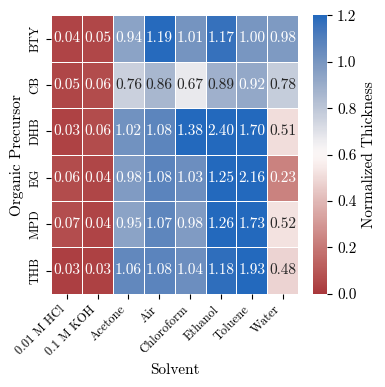

In [38]:
# %% [markdown]
"""
## 3. Individual Heatmaps per Inorganic Group (Fully Annotated)
"""
# %%
cmap_choice = 'vlag_r'
vmin, vmax = 0, 1.2
inorganic_groups = data['Inorganic'].unique()

for inorganic_group in inorganic_groups:
    group_df = data[data['Inorganic'] == inorganic_group]
    pivot_table = group_df.pivot_table(index='Organic', columns='Solvent', values='Normalized Thickness')

    # Check if pivot table is empty
    if pivot_table.empty or pivot_table.shape[0] < 1 or pivot_table.shape[1] < 1:
        print(f"Skipping '{inorganic_group}' - insufficient data.")
        continue

    plt.figure(figsize=(4,4))
    ax = sns.heatmap(
        pivot_table, cmap=cmap_choice, vmin=vmin, vmax=vmax,
        annot=True, fmt='.2f', linewidths=0.5,
        cbar_kws={'label':'Normalized Thickness'}
    )

    ax.set_xlabel('Solvent', fontsize=11)
    ax.set_ylabel('Organic Precursor', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    plt.tight_layout()
    plt.savefig(f'Heatmap_{inorganic_group}.pdf', dpi=600, bbox_inches='tight')
    plt.savefig(f'Heatmap_{inorganic_group}.png', dpi=600, bbox_inches='tight')
    plt.show()


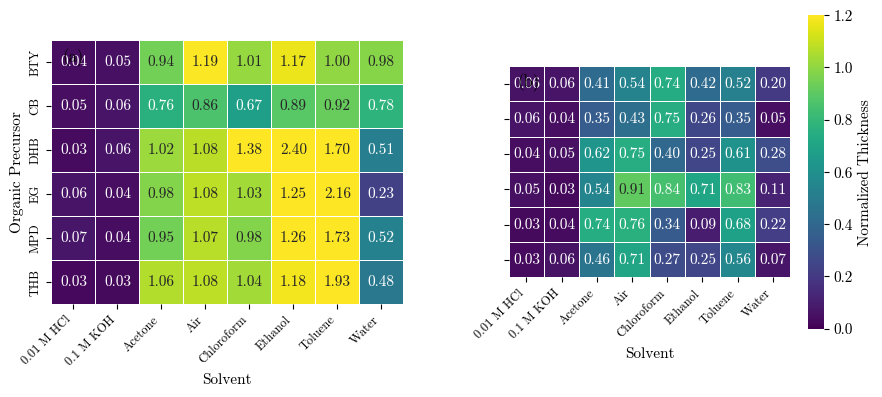

In [41]:
# %% [markdown]
"""
## 4. Combined Side-by-Side Heatmaps for TMA and DEZ (Viridis Colormap)
"""
# %%
# Manually define the two Inorganic types you want to plot
selected_inorganics = ['TMA', 'DEZ']

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(9,4), sharey=True)

panel_labels = ['(a)', '(b)']
cmap_choice = 'viridis'
vmin, vmax = 0, 1.2

# Loop over the selected inorganic types
for idx, (ax, inorganic_group) in enumerate(zip(axes, selected_inorganics)):
    group_df = data[data['Inorganic'] == inorganic_group]
    pivot_table = group_df.pivot_table(index='Organic', columns='Solvent', values='Normalized Thickness')

    if pivot_table.empty or pivot_table.shape[0] < 1 or pivot_table.shape[1] < 1:
        print(f"Skipping '{inorganic_group}' - insufficient data.")
        ax.axis('off')
        continue

    sns.heatmap(
        pivot_table, cmap=cmap_choice, vmin=vmin, vmax=vmax, annot=True, fmt='.2f',
        linewidths=0.5, cbar=(idx==1), square=True,
        cbar_kws={'label':'Normalized Thickness'} if idx==1 else None, ax=ax
    )

    # Panel labels
    ax.text(0.03, 0.97, panel_labels[idx], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

    # Axis labels
    ax.set_xlabel('Solvent', fontsize=11)
    if idx == 0:
        ax.set_ylabel('Organic Precursor', fontsize=11)
    else:
        ax.set_ylabel('')

    # Tick formatting
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)

# Save the figure
fig.savefig('Combined_Heatmap_TMA_DEZ_Viridis.pdf', dpi=600, bbox_inches='tight')
fig.savefig('Combined_Heatmap_TMA_DEZ_Viridis.png', dpi=600, bbox_inches='tight')

plt.show()


C:\Users\dreec\AppData\Local\Temp\ipykernel_2900\515991370.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(exposure_order))


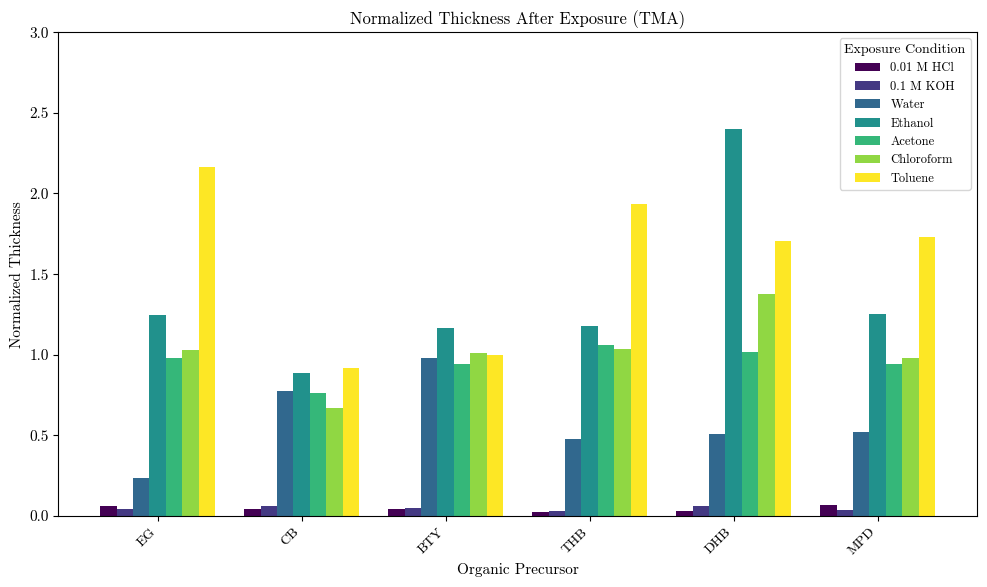

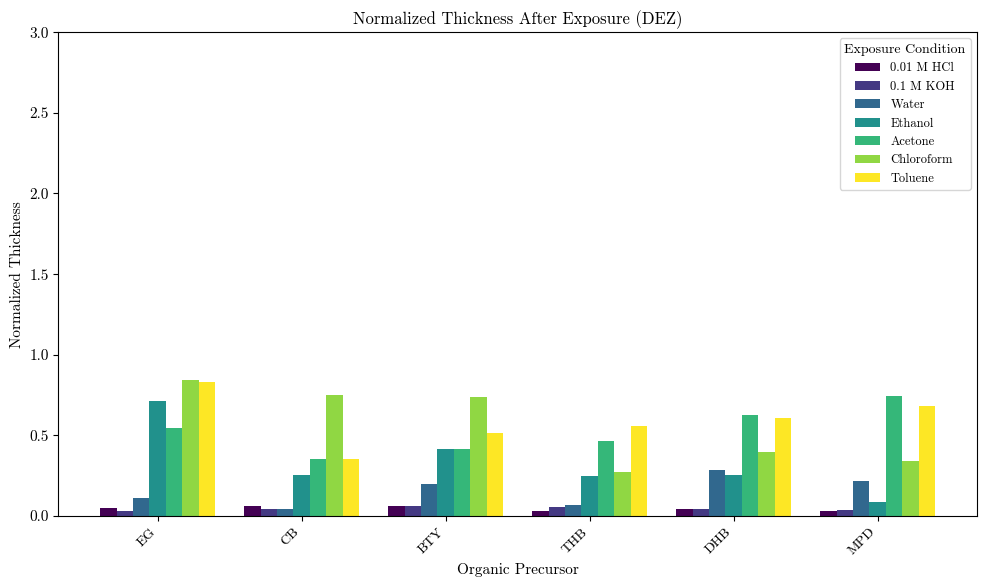

In [49]:
# %% [markdown]
"""
## Final Grouped Bar Charts for TMA and DEZ (Organized, Viridis Colored, Fixed Y-axis)
"""
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load and filter data
data = pd.read_csv('EtchStability_with_HCl_KOH.csv')
data = data[data['Solvent'] != 'Air']

# Define correct exposure order (HCl -> KOH -> Water -> Ethanol -> Acetone -> Chloroform -> Toluene)
exposure_order = ['0.01 M HCl', '0.1 M KOH', 'Water', 'Ethanol', 'Acetone', 'Chloroform', 'Toluene']

# Define correct organic order (chemical structure)
organic_order = ['EG', 'CB', 'BTY', 'THB', 'DHB', 'MPD']

# Create Viridis color palette
viridis = cm.get_cmap('viridis', len(exposure_order))
colors = [viridis(i) for i in range(len(exposure_order))]

# Define inorganics to plot
inorganic_list = ['TMA', 'DEZ']

# Bar width setup
total_width = 0.8
n_conditions = len(exposure_order)
bar_width = total_width / n_conditions

# Loop over TMA and DEZ
for inorganic_choice in inorganic_list:
    # Filter
    filtered_data = data[data['Inorganic'] == inorganic_choice]
    pivot_table = filtered_data.pivot_table(index='Organic', columns='Solvent', values='Normalized Thickness')

    # Reorder exposure conditions and organics
    pivot_table = pivot_table[exposure_order]
    pivot_table = pivot_table.reindex(organic_order)

    # Set up figure
    fig, ax = plt.subplots(figsize=(10, 6))
    organics = pivot_table.index.tolist()
    x = np.arange(len(organics))

    # Plot grouped bars with Viridis colors
    for i, condition in enumerate(exposure_order):
        y = pivot_table[condition].values
        ax.bar(x + i * bar_width, y, width=bar_width, label=condition, color=colors[i])

    # Set X-ticks
    ax.set_xticks(x + total_width/2 - bar_width/2)
    ax.set_xticklabels(organics, rotation=45, ha='right', fontsize=10)

    # Labels and title
    ax.set_ylabel('Normalized Thickness', fontsize=11)
    ax.set_xlabel('Organic Precursor', fontsize=11)
    ax.set_title(f'Normalized Thickness After Exposure ({inorganic_choice})', fontsize=12)

    # Force same Y-axis for both TMA and DEZ
    ax.set_ylim(0, 3)

    # Legend
    ax.legend(title='Exposure Condition', fontsize=9, title_fontsize=10, loc='upper right')

    # Layout and save
    plt.tight_layout()
    fig.savefig(f'Grouped_Bars_{inorganic_choice}_Ordered_Viridis_FixedYAxis.pdf', dpi=600, bbox_inches='tight')
    fig.savefig(f'Grouped_Bars_{inorganic_choice}_Ordered_Viridis_FixedYAxis.png', dpi=600, bbox_inches='tight')
    plt.show()
